In [ ]:
import numpy as np
import pandas as pd

In [ ]:
file_path = r'C:\Users\rashm\OneDrive\Documents\Numpy Ninja\Python Hackathon\OrganDonor_Consolidated.xlsx'
df = pd.ExcelFile(file_path)

In [25]:
# Load the excelsheet
donor_details = df.parse('DonorDetails')
outcomes = df.parse('Outcomes')
referral_details = df.parse('ReferralDetails')
hosp_details = df.parse('OPO_HospDetails')
yearly_outcomes = df.parse('Yearly_Outcomes')

#### Q 71. Which year recorded the highest number of organ procurements from patients who died due to stroke as the mechanism of death? Display this information using a bar chart.

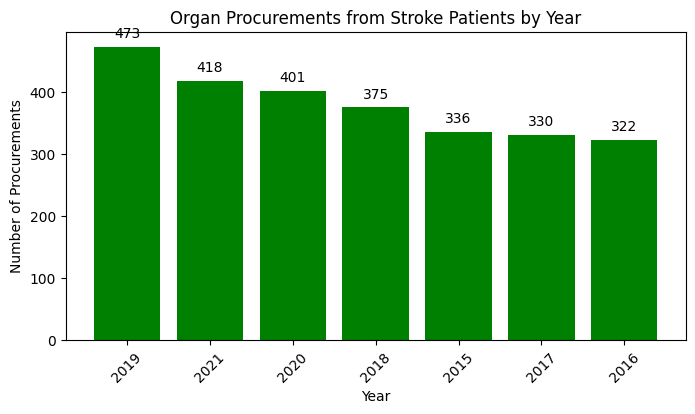

In [75]:

# Lets start with merging data: outcomes and patient_details and referral_details
merged_data_1 = pd.merge(donor_details, outcomes, on='PatientID', how='inner')

merged_data = pd.merge(merged_data_1, referral_details, on='PatientID', how='inner')

# Filter rows where cause of Death is 'stroke'
stroke_data = merged_data[merged_data['mechanism_of_death'] == 'Stroke']

# Group by 'Referral_Year' and count the number of rows (referrals) for each year
stroke_procurements = stroke_data.groupby('Referral_Year').size().reset_index(name='PatientCount')

stroke_procurements = stroke_procurements.sort_values(by='PatientCount', ascending=False)

# Display the year with the highest number of procurements
highest_year = stroke_procurements.iloc[0]

# Plot the results using a bar chart
plt.figure(figsize=(8, 4))
bars = plt.bar(stroke_procurements['Referral_Year'].astype(str), stroke_procurements['PatientCount'], color='green')
# Add annotations to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 10,
             str(yval), ha='center', va='bottom', fontsize=10)
plt.xlabel('Year')
plt.ylabel('Number of Procurements')
plt.title('Organ Procurements from Stroke Patients by Year')
plt.xticks(rotation=45)
plt.show()

#### Q.72 Which organ has the highest chance of being successfully transplanted

In [96]:
import pandas as pd

# Create a function to calculate transplant success rate for each organ
def calculate_success_rate(column_name):
    # Count the number of 'Transplanted' entries
    success_count = outcomes[column_name].apply(lambda x: x == 'Transplanted').sum()
    total_count = outcomes[column_name].notna().sum()
    success_rate = success_count / total_count * 100 if total_count > 0 else 0
    return success_rate

# Calculate success rate for each organ
organ_columns = ['outcome_heart', 'outcome_liver', 'outcome_kidney_left', 'outcome_kidney_right', 'outcome_lung_left']
success_rates = {organ: calculate_success_rate(organ) for organ in organ_columns}

# Find the organ with the highest transplant success rate
highest_rate_organ = max(success_rates, key=success_rates.get)
highest_rate_value = success_rates[highest_rate_organ]

print(f"The organ with the highest transplant success rate is: {highest_rate_organ} with a success rate of {highest_rate_value:.2f}%")


The organ with the highest transplant success rate is: outcome_liver with a success rate of 88.76%


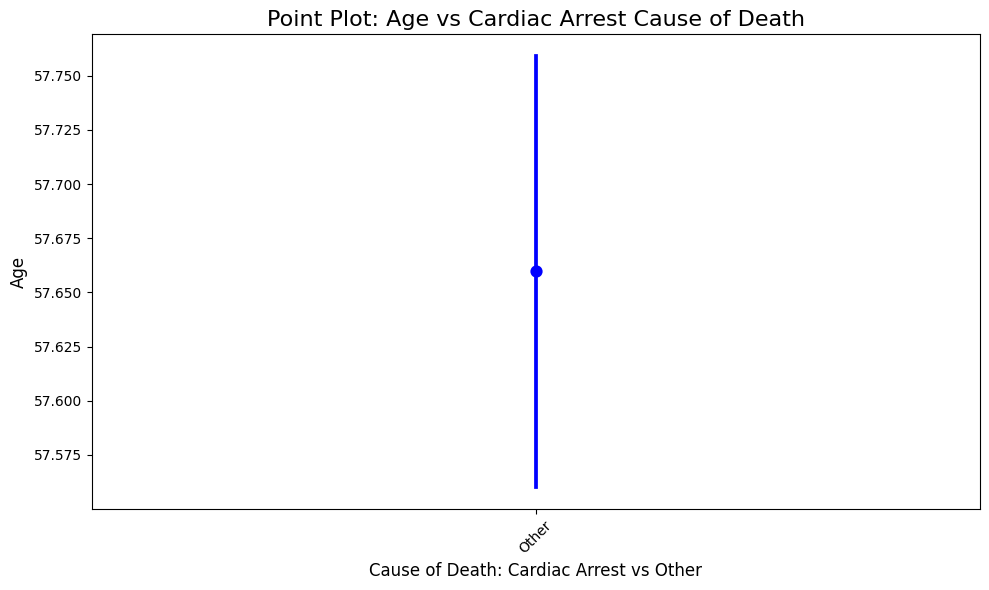

In [79]:
# Create a new column for Cardiac Arrest based on causeofdeath
donor_details['cardiac_arrest'] = donor_details['causeofdeath'].apply(lambda x: 'Cardiac Arrest' if 'Cardiovascular' in x else 'Other')

# Create the point plot
plt.figure(figsize=(10, 6))
sns.pointplot(x='cardiac_arrest', y='age', data=donor_details, markers='o', linestyles='-', color='b')

# Set the title and labels
plt.title('Point Plot: Age vs Cardiac Arrest Cause of Death', fontsize=16)
plt.xlabel('Cause of Death: Cardiac Arrest vs Other', fontsize=12)
plt.ylabel('Age', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

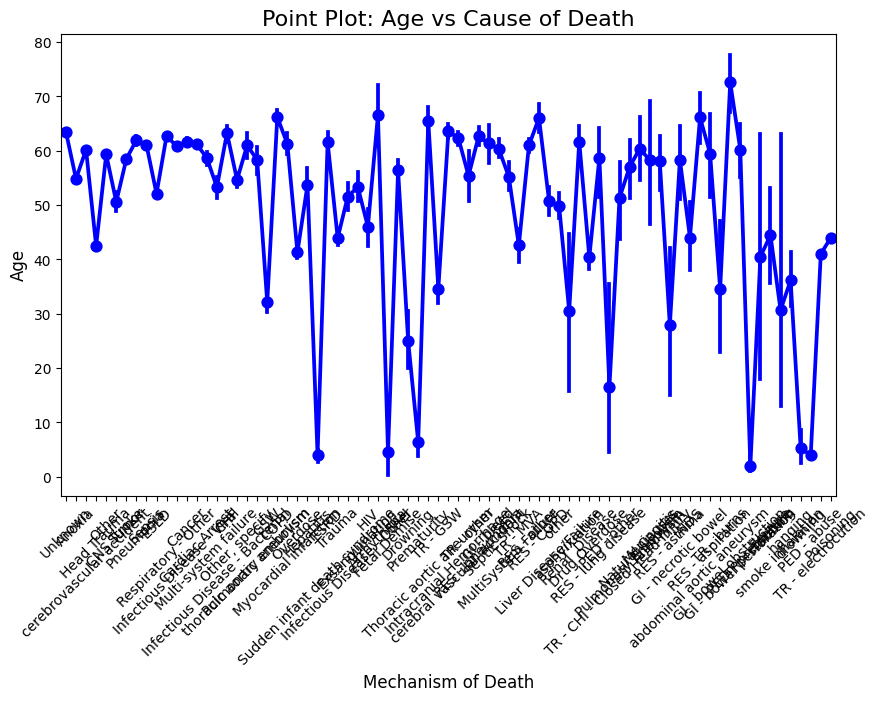

In [81]:
# Create the point plot
plt.figure(figsize=(10, 6))
sns.pointplot(x='causeofdeath', y='age', data=donor_details, markers='o', linestyles='-', color='b')

# Set the title and labels
plt.title('Point Plot: Age vs Cause of Death', fontsize=16)
plt.xlabel('Mechanism of Death', fontsize=12)
plt.ylabel('Age', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.show()

#### Q.77 Using loops, create a multiplication table for the number 8

In [90]:
# Multiplication table for the number 8
number = 8

# Loop through numbers 1 to 10
for i in range(1, 11):
    result = number * i
    print(f"{number} x {i} = {result}")

8 x 1 = 8
8 x 2 = 16
8 x 3 = 24
8 x 4 = 32
8 x 5 = 40
8 x 6 = 48
8 x 7 = 56
8 x 8 = 64
8 x 9 = 72
8 x 10 = 80


#### Q.78 Display random data by splitting it into 4 quartiles and labeling the quartiles.

In [ ]:
# Generate random data
np.random.seed(0)
data = np.random.randn(100)

# Create a DataFrame
df = pd.DataFrame(data, columns=['Value'])

# Calculate quartiles
df['Quartile'] = pd.qcut(df['Value'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Display the data with quartile labels
print(df)


       Value Quartile
0   1.764052       Q4
1   0.400157       Q3
2   0.978738       Q4
3   2.240893       Q4
4   1.867558       Q4
..       ...      ...
95  0.706573       Q3
96  0.010500       Q2
97  1.785870       Q4
98  0.126912       Q3
99  0.401989       Q3

[100 rows x 2 columns]


#### Q.79 Display all details of the oldest female patient.

In [ ]:
# Filter the data to include only female patients
female_patients = donor_details[donor_details['gender'] == 'F']

# Find the oldest female patient
oldest_female_patient = female_patients.loc[female_patients['age'].idxmax()]

# Details of the oldest female patient
print(oldest_female_patient)


PatientID                     OPO1_P26983
age                                 100.0
gender                                  F
race                                Black
causeofdeath                      Unknown
mechanism_of_death                Unknown
brain_death                             0
time_asystole         2037-01-09 15:00:00
time_brain_death                      NaT
cardiac_arrest                      Other
Name: 290, dtype: object
